# Prequisites

In [7]:
import cv2
import numpy as np 
from helper_files.onnx_helpers import img_reshaping
from helper_files.onnx_helpers import onnx2xywh
import onnxruntime as ort
import torch
import matplotlib.pyplot as plt

# Onnx Testing

In [2]:
if torch.cuda.is_available():
    cuda=True
else:
    cuda=False 

model = "C:\git_projects\Road-Runner\weights\Yolov7_v2.onnx"


providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
session = ort.InferenceSession(model, providers=providers)

In [3]:
img = cv2.imread("toll_test.jpg", cv2.COLOR_BGR2RGB)
orig_img = img.copy()
img, ratio, dwdh = img_reshaping(img) #Preprocesses and returns an image array of size (1,3,640,640)

outname = [i.name for i in session.get_outputs()]
inname = [i.name for i in session.get_inputs()]
inp = {inname[0]:img}
outputs = session.run(outname, inp)[0]

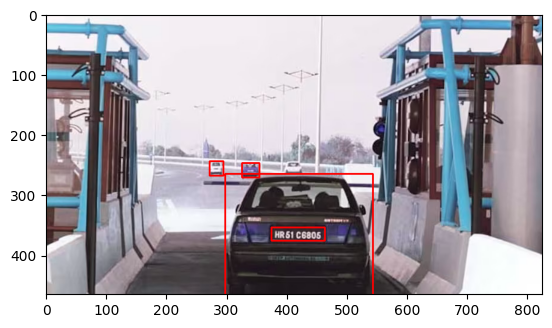

In [8]:
temp = onnx2xywh(outputs, orig_img, dwdh, ratio)
for i in temp:
    row = i[0]
    x1, y1, x2, y2 = row[0], row[1], row[2], row[3]
    cv2.rectangle(orig_img, (x1,y1), (x2,y2), (255,0,0), 2)

plt.imshow(orig_img)